# Chapter 15: NLP Analysis of Large Text Datasets

## 15.1 Loading Online Forum Discussions Using scikit-learn

In [1]:
from sklearn.datasets import fetch_20newsgroups
newsgroups = fetch_20newsgroups(remove=('headers', 'footers'))

In [2]:
# Printing the names of all 20 newsgroups
print(newsgroups.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [3]:
# Printing the first newsgroup post
print(newsgroups.data[0])

I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.


In [4]:
# Printing the newsgroup name at index 0
origin = newsgroups.target_names[newsgroups.target[0]]
print(f"The post at index 0 first appeared in the '{origin}' group")

The post at index 0 first appeared in the 'rec.autos' group


In [5]:
# Counting the number of newsgroup posts
dataset_size = len(newsgroups.data)
print(f"Our dataset contains {dataset_size} newsgroup posts")

Our dataset contains 11314 newsgroup posts


## 15.2 Vectorizing Documents Using scikit-learn

In [6]:
# Initalizing a CountVectorizer object
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [7]:
# TF Matrix: Stores the counds of words (columns) across all texts (rows)
# Computing a TF matrix with scikit-learn
tf_matrix = vectorizer.fit_transform(newsgroups.data)
print(tf_matrix)

  (0, 108644)	4
  (0, 110106)	1
  (0, 57577)	2
  (0, 24398)	2
  (0, 79534)	1
  (0, 100942)	1
  (0, 37154)	1
  (0, 45141)	1
  (0, 70570)	1
  (0, 78701)	2
  (0, 101084)	4
  (0, 32499)	4
  (0, 92157)	1
  (0, 100827)	6
  (0, 79461)	1
  (0, 39275)	1
  (0, 60326)	2
  (0, 42332)	1
  (0, 96432)	1
  (0, 67137)	1
  (0, 101732)	1
  (0, 27703)	1
  (0, 49871)	2
  (0, 65338)	1
  (0, 14106)	1
  :	:
  (11313, 55901)	1
  (11313, 93448)	1
  (11313, 97535)	1
  (11313, 93393)	1
  (11313, 109366)	1
  (11313, 102215)	1
  (11313, 29148)	1
  (11313, 26901)	1
  (11313, 94401)	1
  (11313, 89686)	1
  (11313, 80827)	1
  (11313, 72219)	1
  (11313, 32984)	1
  (11313, 82912)	1
  (11313, 99934)	1
  (11313, 96505)	1
  (11313, 72102)	1
  (11313, 32981)	1
  (11313, 82692)	1
  (11313, 101854)	1
  (11313, 66399)	1
  (11313, 63405)	1
  (11313, 61366)	1
  (11313, 7462)	1
  (11313, 109600)	1


In [8]:
# Checking the data type of tf_matrix
print(type(tf_matrix))

<class 'scipy.sparse._csr.csr_matrix'>


In [9]:
# Compressed Sparse Row (CSR): Storage format for compressing matrices that are composed mostly of zeros
# Sparse Matrix: A matrix with mostly 0s; compression occurs when the 0s are removed, leaving just the data
# Convertinga CSR matrix to a NumPy array
tf_np_matrix = tf_matrix.toarray()
print(tf_np_matrix)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [10]:
# Checking the vocabulary size
assert tf_np_matrix.shape == tf_matrix.shape
num_posts, vocabulary_size = tf_np_matrix.shape
print(f"Our collection of {num_posts} newsgroup posts contain a total of {vocabulary_size} unique words")

Our collection of 11314 newsgroup posts contain a total of 114751 unique words


In [11]:
# Counting the unique words in the car post
import numpy as np
tf_vector = tf_np_matrix[0]
non_zero_indices = np.flatnonzero(tf_vector)
num_unique_words = non_zero_indices.size
print(f"The newsgroup in row 0 contains {num_unique_words} unique words.")
print(f"The actual word counts map to the following column indices:\n {non_zero_indices}")

The newsgroup in row 0 contains 64 unique words.
The actual word counts map to the following column indices:
 [ 14106  15549  22088  23323  24398  27703  29357  30093  30629  32194
  32305  32499  37154  39275  42332  42333  43643  45089  45141  49871
  49881  50165  54442  55453  57577  58321  58842  60116  60326  64083
  65338  67137  67140  68931  69080  70570  72915  75280  78264  78701
  79055  79461  79534  82759  84398  87690  89161  92157  93304  95225
  96145  96432 100406 100827 100942 101084 101732 108644 109086 109254
 109294 110106 112936 113262]


In [12]:
# Printing the unique words in the car post
words = vectorizer.get_feature_names_out()
unique_words = [words[i] for i in non_zero_indices]
print(unique_words)

['60s', '70s', 'addition', 'all', 'anyone', 'be', 'body', 'bricklin', 'bumper', 'called', 'can', 'car', 'could', 'day', 'door', 'doors', 'early', 'engine', 'enlighten', 'from', 'front', 'funky', 'have', 'history', 'if', 'in', 'info', 'is', 'it', 'know', 'late', 'looked', 'looking', 'made', 'mail', 'me', 'model', 'name', 'of', 'on', 'or', 'other', 'out', 'please', 'production', 'really', 'rest', 'saw', 'separate', 'small', 'specs', 'sports', 'tellme', 'the', 'there', 'this', 'to', 'was', 'were', 'whatever', 'where', 'wondering', 'years', 'you']


In [13]:
import pandas as pd
data = {'Word': unique_words,
        'Count': tf_vector[non_zero_indices]}

df = pd.DataFrame(data).sort_values('Count', ascending=False)
print(df[:10].to_string(index=False))

  Word  Count
   the      6
  this      4
   was      4
   car      4
    if      2
    is      2
    it      2
  from      2
    on      2
anyone      2


In [14]:
# Stop Words: Words like "the", "this", "was", etc. that are not unique words with meaning
# Removing stop words during vectorization
vectorizer = CountVectorizer(stop_words='english')
tf_matrix = vectorizer.fit_transform(newsgroups.data)
assert tf_matrix.shape[1] < 114751

words = vectorizer.get_feature_names_out()
for common_word in ['the', 'this', 'was', 'if', 'it', 'on']:
    assert common_word not in words

In [15]:
# Reprinting the top words after stop-word deletion
tf_np_matrix = tf_matrix.toarray()
tf_vector = tf_np_matrix[0]
non_zero_indices = np.flatnonzero(tf_vector)
unique_words = [words[index] for index in non_zero_indices]
data = {'Word': unique_words,
        'Count': tf_vector[non_zero_indices]}

df = pd.DataFrame(data).sort_values('Count', ascending=False)
print(f"After stop-word deletion, {df.shape[0]} unique words remain.")
print(df[:10].to_string(index=False))

After stop-word deletion, 34 unique words remain.
      Word  Count
       car      4
       60s      1
       saw      1
   looking      1
      mail      1
     model      1
production      1
    really      1
      rest      1
  separate      1


## 15.3 Ranking Words by Both Post Frequency and Count

In [16]:
# Filtering matrix columns with non_zero_indices
sub_matrix = tf_np_matrix[:,non_zero_indices]
print("Our sub-matrix corresponds to the 34 words within post 0. The first row of the sub-matrix is:")
print(sub_matrix[0])

Our sub-matrix corresponds to the 34 words within post 0. The first row of the sub-matrix is:
[1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [17]:
# Converting word counts to binary values
# Every element (i, j) is 1 if word j is present in post i, otherwise 0
from sklearn.preprocessing import binarize
binary_matrix = binarize(sub_matrix)
print(binary_matrix)

[[1 1 1 ... 1 1 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [18]:
# Summing matrix rows to obtain post counts
unique_post_mentions = binary_matrix.sum(axis=0)
print(f"This vector counts the unique posts in which each word is mentioned:\n {unique_post_mentions}")

This vector counts the unique posts in which each word is mentioned:
 [  18   21  202  314    4   26  802  536  842  154   67  348  184   25
    7  368  469 3093  238  268  780  901  292   95 1493  407  354  158
  574   95   98    2  295 1174]


In [19]:
# Computing post mention counts in a single line of code
np_post_mentions = binarize(tf_np_matrix[:,non_zero_indices]).sum(axis=0)
csr_post_mentions = binarize(tf_matrix[:,non_zero_indices]).sum(axis=0)
print(f"NumPy matrix-generated counts:\n {np_post_mentions}\n")
print(f"CSR matrix-generated counts:\n {csr_post_mentions}")

NumPy matrix-generated counts:
 [  18   21  202  314    4   26  802  536  842  154   67  348  184   25
    7  368  469 3093  238  268  780  901  292   95 1493  407  354  158
  574   95   98    2  295 1174]

CSR matrix-generated counts:
 [[  18   21  202  314    4   26  802  536  842  154   67  348  184   25
     7  368  469 3093  238  268  780  901  292   95 1493  407  354  158
   574   95   98    2  295 1174]]


In [20]:
# Printing the words with the highest document frequency
document_frequencies = unique_post_mentions / dataset_size
data = {'Word': unique_words,
        'Count': tf_vector[non_zero_indices],
        'Document Frequency': document_frequencies}

df = pd.DataFrame(data)
df_common_words = df[df['Document Frequency'] >= .1]
print(df_common_words.to_string(index=False))

  Word  Count  Document Frequency
  know      1            0.273378
really      1            0.131960
 years      1            0.103765


In [21]:
# Ranking words by both count and document frequency
df_sorted = df.sort_values(['Count', 'Document Frequency'], ascending=[False, True])
print(df_sorted[:10].to_string(index=False))

      Word  Count  Document Frequency
       car      4            0.047375
    tellme      1            0.000177
  bricklin      1            0.000354
     funky      1            0.000619
       60s      1            0.001591
       70s      1            0.001856
 enlighten      1            0.002210
    bumper      1            0.002298
     doors      1            0.005922
production      1            0.008397


In [22]:
# Combining counts and fequencies into a single score
inverse_document_frequencies = 1 / document_frequencies
df['IDF'] = inverse_document_frequencies
df['Combined'] = df.Count * inverse_document_frequencies
df_sorted = df.sort_values('Combined', ascending=False)
print(df_sorted[:10].to_string(index=False))

      Word  Count  Document Frequency         IDF    Combined
    tellme      1            0.000177 5657.000000 5657.000000
  bricklin      1            0.000354 2828.500000 2828.500000
     funky      1            0.000619 1616.285714 1616.285714
       60s      1            0.001591  628.555556  628.555556
       70s      1            0.001856  538.761905  538.761905
 enlighten      1            0.002210  452.560000  452.560000
    bumper      1            0.002298  435.153846  435.153846
     doors      1            0.005922  168.865672  168.865672
     specs      1            0.008397  119.094737  119.094737
production      1            0.008397  119.094737  119.094737


In [23]:
# Shrinking a large value using its logarithm
assert np.log10(1000000) == 6

In [24]:
# Adjusting the combined score using logarithms
df['Combined'] = df.Count * np.log10(df.IDF)
df_sorted = df.sort_values('Combined', ascending=False)
print(df_sorted[:10].to_string(index=False))

     Word  Count  Document Frequency         IDF  Combined
      car      4            0.047375   21.108209  5.297806
   tellme      1            0.000177 5657.000000  3.752586
 bricklin      1            0.000354 2828.500000  3.451556
    funky      1            0.000619 1616.285714  3.208518
      60s      1            0.001591  628.555556  2.798344
      70s      1            0.001856  538.761905  2.731397
enlighten      1            0.002210  452.560000  2.655676
   bumper      1            0.002298  435.153846  2.638643
    doors      1            0.005922  168.865672  2.227541
    specs      1            0.008397  119.094737  2.075893


* Inverse Document Frequencies (IDF): The array of 1 / Document_Frequencies
* Term Frequency-Inverse Document Frequency (TFIDF): Computed by taking the product of the TF (word count) and the log of the IDF

### 15.3.1 Computing TFIDF vectors with scikit-learn

In [25]:
# Computing a TFIDF matrix with scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(newsgroups.data)
assert tfidf_matrix.shape == tf_matrix.shape

In [26]:
# Confirming the preservation of vectorized word indices
# Line below doesn't work for no reason
# assert tfidf_vectorizer.get_feature_names_out() == words
assert np.array_equal(tfidf_vectorizer.get_feature_names_out(), words)

In [27]:
# Confirming the preservation of nonzero indices
tfidf_np_matrix = tfidf_matrix.toarray()
tfidf_vector = tfidf_np_matrix[0]
tfidf_non_zero_indices = np.flatnonzero(tfidf_vector)
assert np.array_equal(tfidf_non_zero_indices, non_zero_indices)

In [28]:
# Adding a TFIDF vector to the existing Pandas table
df['TFIDF'] = tfidf_vector[non_zero_indices]

In [29]:
# Sorting words by df.TFIDF
df_sorted_old = df.sort_values('Combined', ascending=False)
df_sorted_new = df.sort_values('TFIDF', ascending=False)
assert np.array_equal(df_sorted_old['Word'].values, df_sorted_new['Word'].values)
print(df_sorted_new[:10].to_string(index=False))

     Word  Count  Document Frequency         IDF  Combined    TFIDF
      car      4            0.047375   21.108209  5.297806 0.459552
   tellme      1            0.000177 5657.000000  3.752586 0.262118
 bricklin      1            0.000354 2828.500000  3.451556 0.247619
    funky      1            0.000619 1616.285714  3.208518 0.234280
      60s      1            0.001591  628.555556  2.798344 0.209729
      70s      1            0.001856  538.761905  2.731397 0.205568
enlighten      1            0.002210  452.560000  2.655676 0.200827
   bumper      1            0.002298  435.153846  2.638643 0.199756
    doors      1            0.005922  168.865672  2.227541 0.173540
    specs      1            0.008397  119.094737  2.075893 0.163752


In [30]:
# Confirming taht our TFIDF vector is normalized
from numpy.linalg import norm
assert norm(df.TFIDF.values) == 1

## 15.4 Computing Similarities Across Large Document Datasets

In [31]:
# Computing similarities to a single newsgroup post
cosine_similarities = tfidf_np_matrix @ tfidf_np_matrix[0]
print(cosine_similarities)

[1.         0.00834093 0.04448717 ... 0.         0.00270615 0.01968562]


In [32]:
# Finding the most similar newsgroup post
most_similar_index = np.argsort(cosine_similarities)[-2]
similarity = cosine_similarities[most_similar_index]
most_similar_post = newsgroups.data[most_similar_index]
print(f"The following post has a cosine similarity of {similarity:.2f} with newsgroups.data[0]:")
print(most_similar_post)

The following post has a cosine similarity of 0.64 with newsgroups.data[0]:
In article <1993Apr20.174246.14375@wam.umd.edu> lerxst@wam.umd.edu (where's my  
thing) writes:
> 
>  I was wondering if anyone out there could enlighten me on this car I saw
> the other day. It was a 2-door sports car, looked to be from the late 60s/
> early 70s. It was called a Bricklin. The doors were really small. In  
addition,
> the front bumper was separate from the rest of the body. This is 
> all I know. If anyone can tellme a model name, engine specs, years
> of production, where this car is made, history, or whatever info you
> have on this funky looking car, please e-mail.

Bricklins were manufactured in the 70s with engines from Ford. They are rather  
odd looking with the encased front bumper. There aren't a lot of them around,  
but Hemmings (Motor News) ususally has ten or so listed. Basically, they are a  
performance Ford with new styling slapped on top.

>    ---- brought to you by your neigh

In [33]:
# Dimensionally reducing tfidf_matrix using SVD
np.random.seed(0)
from sklearn.decomposition import TruncatedSVD

shrunk_matrix = TruncatedSVD(n_components=100).fit_transform(tfidf_matrix)
print(f"We've dimensionally reduced a {tfidf_matrix.shape[1]}-column {type(tfidf_matrix)} matrix.")
print(f"Our output is a {shrunk_matrix.shape[1]}-column {type(shrunk_matrix)} matrix.")

We've dimensionally reduced a 114441-column <class 'scipy.sparse._csr.csr_matrix'> matrix.
Our output is a 100-column <class 'numpy.ndarray'> matrix.


In [34]:
# Checking the magnitude of shrunk_matrix[0]
magnitude = norm(shrunk_matrix[0])
print(f"the magnitude of the first row is {magnitude:.2f}")

the magnitude of the first row is 0.49


In [35]:
# Normalizing the SVD output
from sklearn.preprocessing import normalize
shrunk_norm_matrix = normalize(shrunk_matrix)
magnitude = norm(shrunk_norm_matrix[0])
print(f"The magnitude of the first row is {magnitude:.2f}")

The magnitude of the first row is 1.00


In [36]:
# Computing all-by-all cosine similarities
cosine_similarity_matrix = shrunk_norm_matrix @ shrunk_norm_matrix.T

In [37]:
# Choosing a random pair of similar posts
np.random.seed(1)
index1 = np.random.randint(dataset_size)
index2 = np.argsort(cosine_similarity_matrix[index1])[-2]
similarity = cosine_similarity_matrix[index1][index2]
print(f"The posts at indices {index1} and {index2} share a cosine similarity of {similarity:.2f}")

The posts at indices 235 and 7805 share a cosine similarity of 0.91


In [38]:
# Printing a randomly chosen post
print(newsgroups.data[index2].replace('\n\n', '\n'))

Hello,
	Who can tell me   Where can I find the PD or ShareWare   
Which can CAPTURE windows 3.1's output of printer mananger?
	I want to capture the output of HP Laser Jet III.
	Though the PostScript can setup to print to file,but HP can't.
	I try DOS's redirect program,but they can't work in Windows 3.1
		Thankx for any help....
--
 Internet Address: u7911093@cc.nctu.edu.tw
    English Name: Erik Wang
    Chinese Name: Wang Jyh-Shyang


In [39]:
# Printing the most similar response
print(newsgroups.data[index1].replace('\n\n', '\n'))

u7911093@cc.nctu.edu.tw ("By SWH ) writes:
>Who can tell me which program (PD or ShareWare) can redirect windows 3.1's
>output of printer manager to file? 
>	I want to capture HP Laser Jet III's print output.
> 	Though PostScript can setup print to file,but HP can't.
>	I use DOS's redirect program,but they can't work in windows.
>		Thankx for any help...
>--
> Internet Address: u7911093@cc.nctu.edu.tw
>    English Name: Erik Wang
>    Chinese Name: Wang Jyh-Shyang
> National Chiao-Tung University,Taiwan,R.O.C.
Try setting up another HPIII printer but when choosing what port to connect it
to choose FILE instead of like :LPT1.  This will prompt you for a file name
everytime you print with that "HPIII on FILE" printer. Good Luck.



## 15.5 Clustering Texts by Topic

In [40]:
# Clustering newsgroup posts with DBSCAN
from sklearn.cluster import DBSCAN
cluster_model = DBSCAN(eps=0.4, min_samples=50, metric='cosine')
clusters = cluster_model.fit_predict(shrunk_matrix)

In [41]:
# Counting the number of DBSCAN clusters
cluster_count = clusters.max() + 1
print(f"We've generated {cluster_count} DBSCAN clusters")

We've generated 3 DBSCAN clusters


* Can only use K-means on normalized vectors as if they are normalized, their euclidean distance is an adequate substituiton for cosine similarity
* **Mini-Batch K-means:** Rather than using all of the data of a matrix to generate an elbow-plot, take a random sample of data and run analysis on that
* Note that with this huge dataset (>10000) this the efficiency is only possible after dimensionally reducing the data

In [42]:
# Comparing KMeans to MiniBatchKMeans
np.random.seed(0)
import time
from sklearn.cluster import KMeans, MiniBatchKMeans

k=20
times = []
for KMeans_class in [KMeans, MiniBatchKMeans]:
    start_time = time.time()
    KMeans_class(k).fit(shrunk_norm_matrix)
    times.append(time.time() - start_time)
    
running_time_ratio = times[0] / times[1]
print(f"Mini Batch K-means ran {running_time_ratio:.2f} times faster than regular K-means")

C:\Users\meowm\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\meowm\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Mini Batch K-means ran 4.27 times faster than regular K-means


C:\Users\meowm\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\meowm\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\meowm\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\meowm\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\meowm\anaconda3\lib\site-packages\sklearn\cluster\_

C:\Users\meowm\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\meowm\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\meowm\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\meowm\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\meowm\anaconda3\lib\site-packages\sklearn\cluster\_

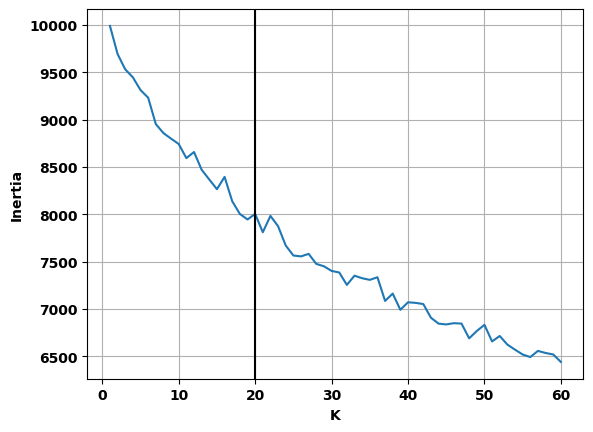

In [44]:
# Plotting an elbow curve using MiniBatchKMeans
np.random.seed(0)
import matplotlib.pyplot as plt

k_values = range(1, 61)
inertia_values = [MiniBatchKMeans(k).fit(shrunk_norm_matrix).inertia_ for k in k_values]
plt.plot(k_values, inertia_values)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.axvline(20, c='k')
plt.grid(True)
plt.show()

In [46]:
# Clustering newsgroup posts into 20 clusters
np.random.seed(0)
cluster_model = KMeans(n_clusters=20)
clusters = cluster_model.fit_predict(shrunk_norm_matrix)
df = pd.DataFrame({'Index': range(clusters.size), 'Cluster': clusters})

C:\Users\meowm\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### 15.5.1 Exploring a single text cluster

In [47]:
# Isolating the car cluster
df_car = df[df.Cluster == clusters[0]]
cluster_size = df_car.shape[0]
print(f"{cluster_size} posts cluster together with the car-themed post at index 0")

409 posts cluster together with the car-themed post at index 0


In [48]:
# Printing a random post in the car cluster
np.random.seed(1)
def get_post_category(index):
    target_index = newsgroups.target[index]
    return newsgroups.target_names[target_index]

random_index = np.random.choice(df_car.Index.values)
post_category = get_post_category(random_index)

print(f"This post appeared in the {post_category} discussion group:\n")
print(newsgroups.data[random_index].replace('\n\n', '\n'))

This post appeared in the rec.autos discussion group:

In article <1993Apr20.174246.14375@wam.umd.edu> lerxst@wam.umd.edu (where's my  
thing) writes:
> 
>  I was wondering if anyone out there could enlighten me on this car I saw
> the other day. It was a 2-door sports car, looked to be from the late 60s/
> early 70s. It was called a Bricklin. The doors were really small. In  
addition,
> the front bumper was separate from the rest of the body. This is 
> all I know. If anyone can tellme a model name, engine specs, years
> of production, where this car is made, history, or whatever info you
> have on this funky looking car, please e-mail.
Bricklins were manufactured in the 70s with engines from Ford. They are rather  
odd looking with the encased front bumper. There aren't a lot of them around,  
but Hemmings (Motor News) ususally has ten or so listed. Basically, they are a  
performance Ford with new styling slapped on top.
>    ---- brought to you by your neighborhood Lerxst ----
Rus

In [49]:
# Checking cluster membership to rec.autos
rec_autos_count = 0
for index in df_car.Index.values:
    if get_post_category(index) == 'rec.autos':
        rec_autos_count += 1

rec_autos_percent = 100 * rec_autos_count / cluster_size
print(f"{rec_autos_percent:.2f}% of posts within the cluster appeared in the rec.autos discussion group")

83.62% of posts within the cluster appeared in the rec.autos discussion group


In [52]:
# Examining a post that did not appear in rec.autos
np.random.seed(1)
not_autos_indices = [index for index in df_car.Index.values if get_post_category(index) != 'rec.autos']

random_index = np.random.choice(not_autos_indices)
post_category = get_post_category(random_index)

print(f"This post appeared in the {post_category} discussion group:\n")
print(newsgroups.data[random_index].replace('\n\n', '\n'))

This post appeared in the misc.forsale discussion group:

1976 BMW 530i
The original four door sports sedan

Arctic Blue metallic with gold alloy plus-1 wheels (Rial 15")
Goodyear Eagle GT+4 racing tires (mud/snow-rated)
3.0 liter, 186 HP, fuel injected engine w/Stahl headers
adjustable gas shocks all around (Koni,BYK)
4 speed stick, 4 wheel power disc brakes, sunroof, PS, AC
Listen-Up installed hidden speaker stereo w/subwoofer
208K miles (yet much better condition than most cars w/100K)
Meticulously maintained: all records, 3K mi oil changes
Faded paint on top, otherwise excellent exterior and interior.
The car has required no major repair work in the more than ten years I have
owned it. It has never failed to start or broken down, even in the coldest
weather. This has been an extraordinarily reliable and economical car, and
shows every sign of staying that way. Yet it is an absolute thrill to drive
when you take it to secluded twisty mountain road! I sell it now,
reluctantly, since 

In [53]:
# Ranking the top 10 words with TFIDF
def rank_words_by_tfidf(indices, word_list=words):
    summed_tfidf = np.asarray(tfidf_matrix[indices].sum(axis=0))[0]
    data = {'Word': word_list,
            'Summed TFIDF': summed_tfidf}
    return pd.DataFrame(data).sort_values('Summed TFIDF', ascending=False)

df_ranked_words = rank_words_by_tfidf(not_autos_indices)
print(df_ranked_words[:10].to_string(index=False))

    Word  Summed TFIDF
     car      8.311434
   radar      2.439239
   radio      2.004262
    cars      1.856726
   speed      1.716273
     ham      1.681461
detector      1.370761
   miles      1.369876
    just      1.289348
     com      1.182443


In [54]:
# Ranking the top 10 words in the car cluster
df_ranked_words = rank_words_by_tfidf(df_car.Index.values)
print(df_ranked_words[:10].to_string(index=False))

   Word  Summed TFIDF
    car     48.311334
   cars     17.891155
 engine     11.482422
 dealer      8.501634
    com      7.921964
   just      7.466364
 writes      7.347268
    edu      7.259972
   good      6.937673
article      6.893581


## 15.6 Visualizing Text Clusters

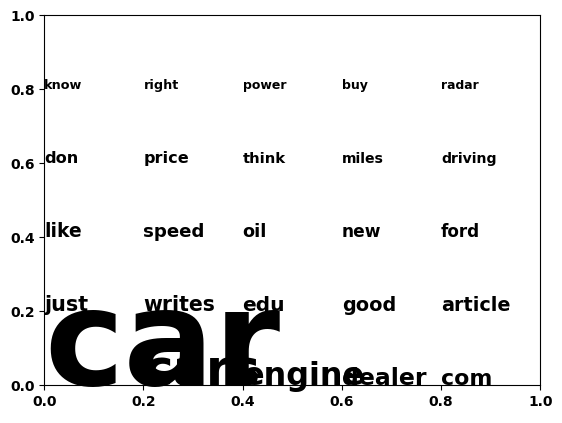

In [55]:
# Word Cloud: Word size represents significance
# Plotting a word cloud with matplotlib
i = 0
for x_coord in np.arange(0, 1, .2):
    for y_coord in np.arange(0, 1, .2):
        word, significance = df_ranked_words.iloc[i].values
        plt.text(y_coord, x_coord, word, fontsize=2*significance)
        i += 1
        
plt.show()

In [57]:
# Initializing the WordCloud class
from wordcloud import WordCloud
cloud_generator = WordCloud(random_state=1)

In [58]:
# Generating a word cloud image
words_to_score = {word: score for word, score in df_ranked_words[:10].values}
wordcloud_image = cloud_generator.fit_words(words_to_score)

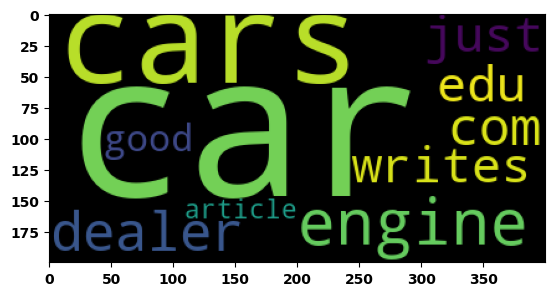

In [59]:
# Plotting an image using plt.imshow
plt.imshow(wordcloud_image)
plt.show()

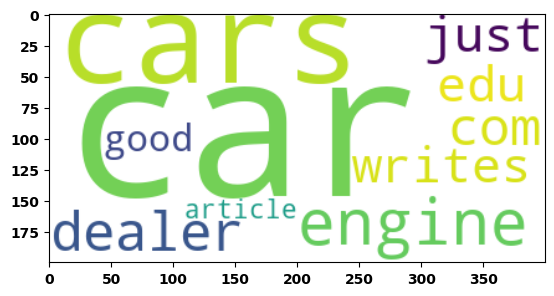

In [61]:
# Improving the word cloud image quality
cloud_generator = WordCloud(background_color='white', random_state=1)
wordcloud_image = cloud_generator.fit_words(words_to_score)
plt.imshow(wordcloud_image, interpolation='bilinear')
plt.show()

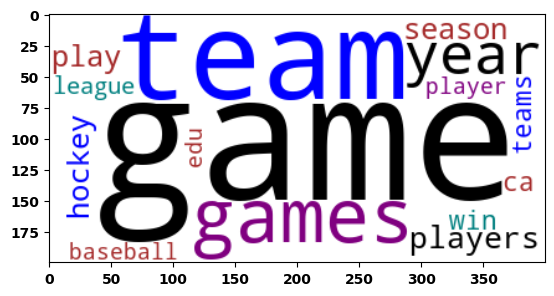

In [62]:
# Plotting a word cloud for a random cluster
np.random.seed(1)

def cluster_to_image(df_cluster, max_words=15):
    indices = df_cluster.Index.values
    df_ranked_words = rank_words_by_tfidf(indices)[:max_words]
    words_to_score = {word: score for word, score in df_ranked_words[:max_words].values}
    cloud_generator = WordCloud(background_color='white', color_func=_color_func, random_state=1)
    wordcloud_image = cloud_generator.fit_words(words_to_score)
    return wordcloud_image

def _color_func(*args, **kwargs):
    return np.random.choice(['black', 'blue', 'teal', 'purple', 'brown'])

cluster_id = np.random.randint(0, 20)
df_random_cluster = df[df.Cluster == cluster_id]
wordcloud_image = cluster_to_image(df_random_cluster)
plt.imshow(wordcloud_image, interpolation='bilinear')
plt.show()

In [63]:
# Checking the most common cluster category
from collections import Counter

def get_top_category(df_cluster):
    categories = [get_post_category(index) for index in df_cluster.Index.values]
    top_category, _ = Counter(categories).most_common()[0]
    return top_category

top_category = get_top_category(df_random_cluster)
print(f"The posts within the cluster commonly appear in the '{top_category}' newsgroup")

The posts within the cluster commonly appear in the 'rec.sport.hockey' newsgroup


### 15.6.1 Using Subplots to Display Multiple Word Clouds

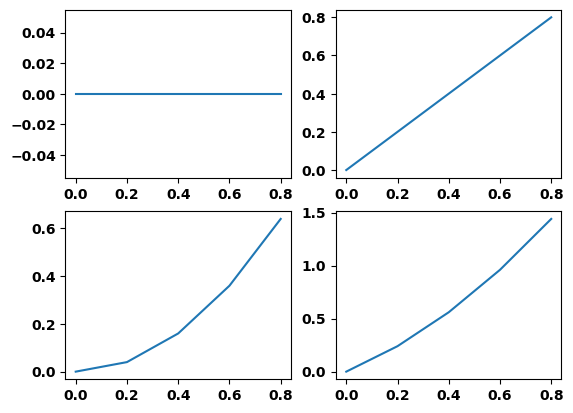

In [66]:
# Generating four subplots using Matplotlib
figure, axes = plt.subplots(2, 2)
for r in range(2):
    for c in range(2):
        x = np.arange(0, 1, 0.2)
        y = r * x * x + c * x
        axes[r][c].plot(x, y)
        
plt.show()

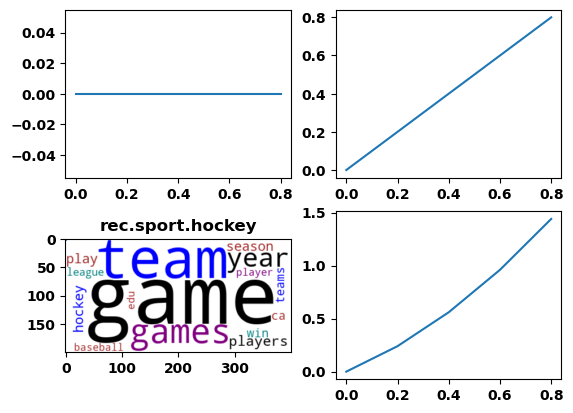

In [68]:
# Plotting a word cloud within a subplot
figure, axes = plt.subplots(2, 2)
for r in range(2):
    for c in range(2):
        if (r, c) == (1, 0):
            axes[r][c].set_title(top_category)
            axes[r][c].imshow(wordcloud_image, interpolation='bilinear')
        else:
            x = np.arange(0, 1, 0.2)
            y = r * x * x + c * x
        axes[r][c].plot(x, y)

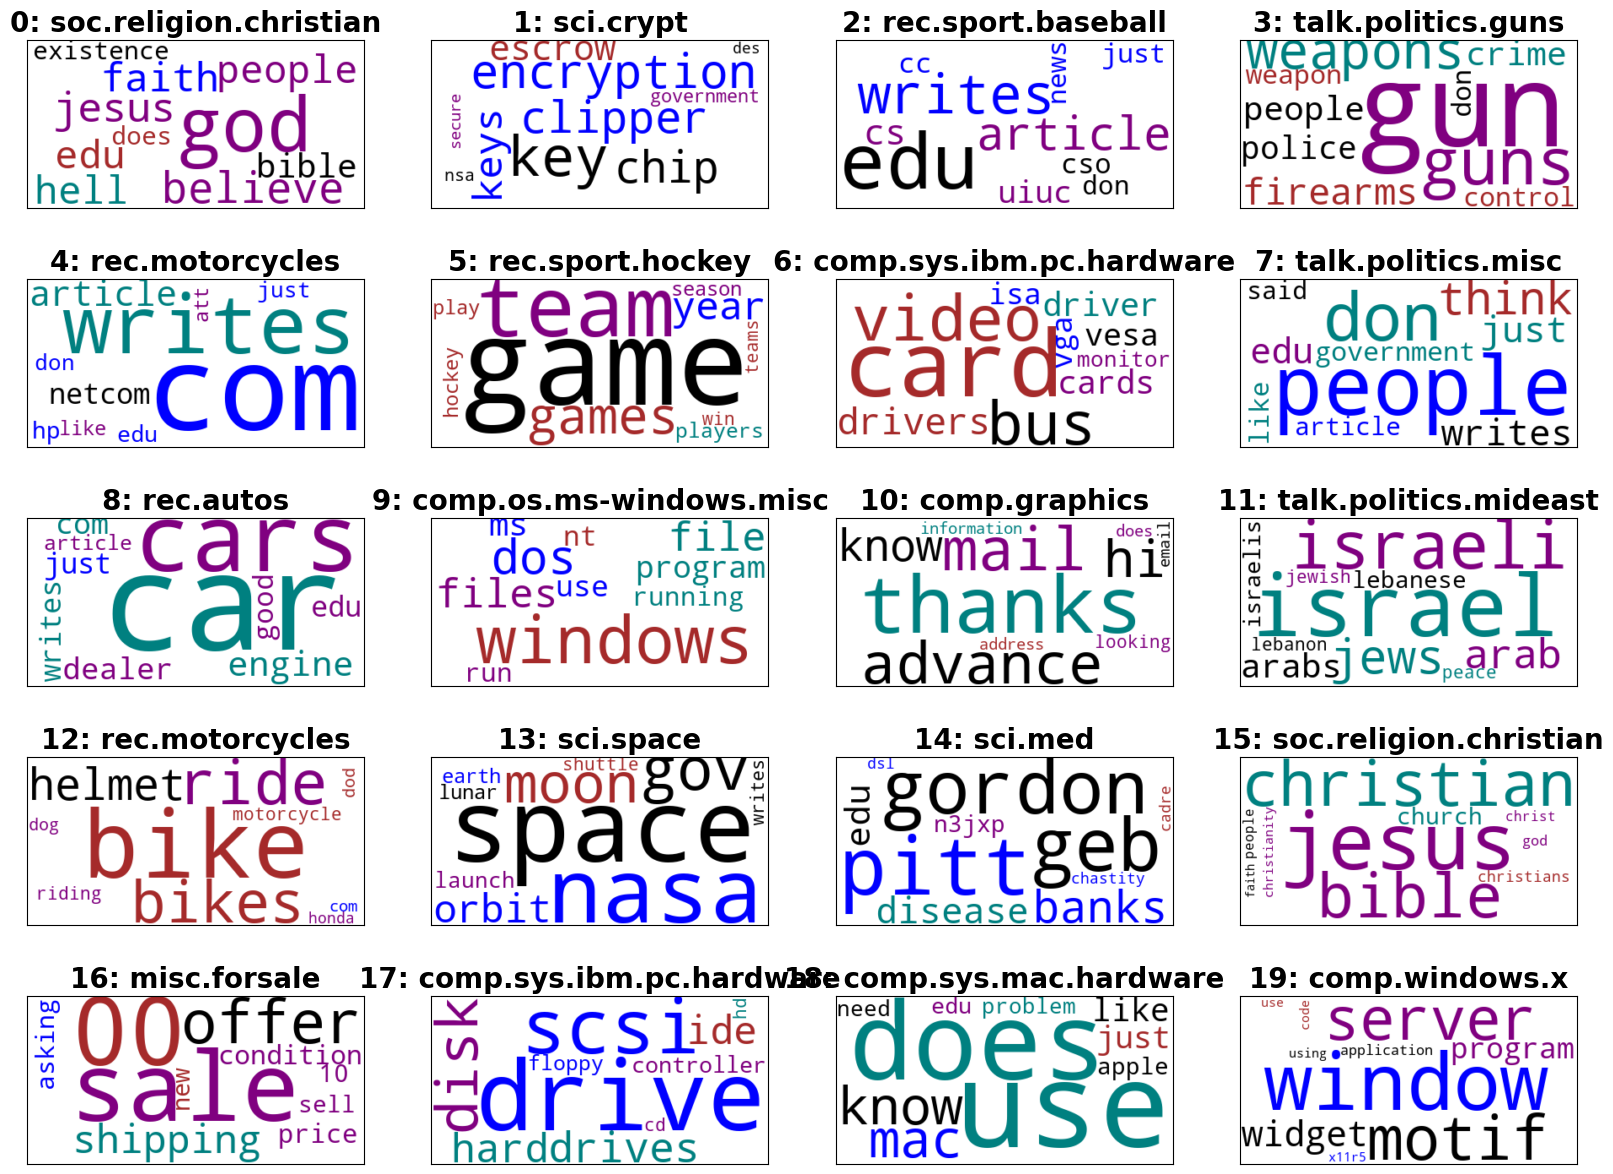

In [69]:
# Visualizing all clusters using 20 subplots
np.random.seed(0)

def get_title(df_cluster):
    top_category = get_top_category(df_cluster)
    cluster_id = df_cluster.Cluster.values[0]
    return f"{cluster_id}: {top_category}"

figure, axes = plt.subplots(5, 4, figsize=(20, 15))
cluster_groups = list(df.groupby('Cluster'))
for r in range(5):
    for c in range(4):
        _, df_cluster = cluster_groups.pop(0)
        wordcloud_image = cluster_to_image(df_cluster, max_words=10)
        ax = axes[r][c]
        ax.imshow(wordcloud_image, interpolation='bilinear')
        ax.set_title(get_title(df_cluster), fontsize=20)
        ax.set_xticks([])
        ax.set_yticks([])
        
plt.show()

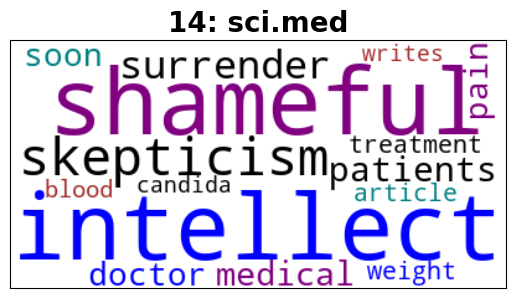

In [73]:
# Recomputing a word cloud after filtering
np.random.seed(3)
df_cluster = df[df.Cluster == 14]
df_ranked_words = rank_words_by_tfidf(df_cluster.Index.values)

words_to_score = {word: score for word, score in df_ranked_words[10:25].values}
cloud_generator = WordCloud(background_color='white', color_func=_color_func, random_state=1)
wordcloud_image = cloud_generator.fit_words(words_to_score)
plt.imshow(wordcloud_image, interpolation="bilinear")
plt.title(get_title(df_cluster), fontsize=20)
plt.xticks([])
plt.yticks([])
plt.show()

# Key Words / Notes:
* **Stop Words:** The most fequently used english words such as *the* and *this*; normally remove them when doing NLP; different people have different stop words
* Term Frequency (TF) matrices are sparse, so we can use np.flatnonzero to access the nonzero words
* **Document Frequency:** The total fraction of texts in which that word appears; words that are more common are less significant
* **Term Frequency-Inverse Document Frequency (TFIDF):** A combined score of TF and IDF
* Large TFIDF matrices should be dimensionally reduced before clustering; recommended number of dimensions is 100
* We use K-means because there is no way of selecting good paramaters for DBSCAN; make an elbow plot for K-means with MiniBatchKMeans instead (random sampling of data rather than the whole dataset to allow for faster estimations of what value for K to select)
* **Word Cloud:** 2D image composed of words, where word size is proportional to significance
* Can plot multiple subplots on one plot with plt.subplots(rows, columns)